# Solutions to the stochastic differential equation presented in chapter 5 of Oksendal book
## These are the SDEs that present an explicit analytical solution. Numerical methods will be treated on another time

# 1) the geometric brownian motion
The **Geometric Brownian Motion (GBM)** is defined by the following stochastic differential equation:

$$
dX_t = \mu X_t \, dt + \sigma X_t \, dB_t, \quad X_0 > 0
$$

By applying **Itô's formula** to the function $f(t, X_t) = \log X_t$, we obtain the explicit solution:

$$
X_t = X_0 \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma B_t \right)
$$


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook','grid'])
mu = 0.1                # coefficiente di drift
sigma = 0.2             # coefficiente di volatilità
X0 = 1.0                # condizione iniziale: X(0)
T = 1.0                 # tempo finale
N = 1000                # numero di suddivisioni
dt = T / N              # passo temporale
t = np.linspace(0, T, N)

In [13]:
# 2. Simulazione di B_t (Brownian Motion)
#np.random.seed(0)
dB = np.random.normal(0, np.sqrt(dt), size=N)  # increments ~ N(0, dt)
B = np.cumsum(dB)                  


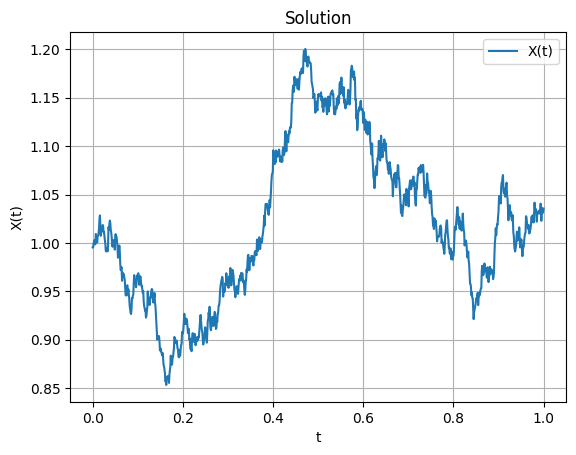

In [14]:
X = X0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * B)
plt.plot(t, X, label='X(t)')
plt.title("Solution")
plt.xlabel("t")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

# 2)
The process defined by:

$$
X_t = e^{B_t}
$$

solves the stochastic differential equation:

$$
dX_t = \frac{1}{2} X_t \, dt + X_t \, dB_t
$$

This follows directly by applying Itô's formula to the function $Y_t=g(t,X_t) =log(X_t)$.


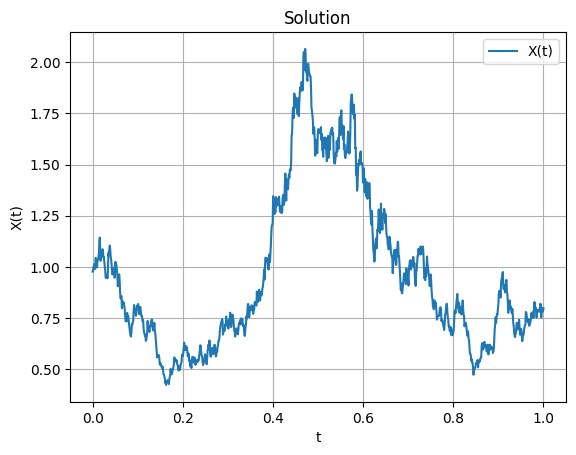

In [15]:
X=X0*np.exp(B)
plt.plot(t, X, label='X(t)')
plt.title("Solution")
plt.xlabel("t")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

# 3)
The process defined by:

$$
X_t = {B_t \over (1+t)}
$$

solves the stochastic differential equation:

$$
dX_t = -\frac{1}{1 + t} X_t \, dt + \frac{1}{1 + t} \, dB_t, \quad X_0 = 0
$$




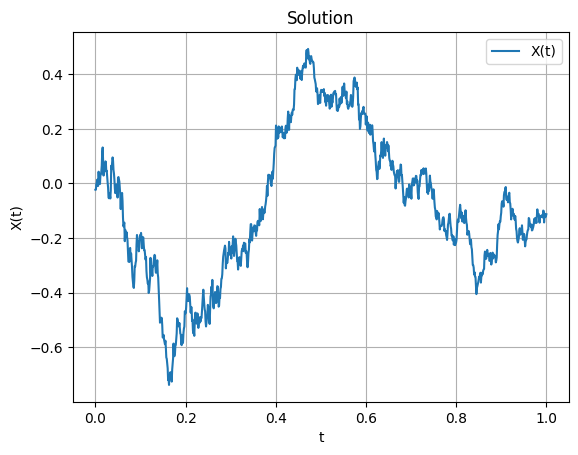

In [16]:
X0=0
X=B/(1+t)
plt.plot(t, X, label='X(t)')
plt.title("Solution")
plt.xlabel("t")
plt.ylabel("X(t)")
plt.grid(True)
plt.legend()
plt.show()

# 4)

The process defined by:

$$
X_t = \sin(B_t)
$$

with initial condition \( B_0 = a \in \left(-\frac{\pi}{2}, \frac{\pi}{2} \right) \)

solves the stochastic differential equation:

$$
dX_t = -\frac{1}{2} X_t \, dt + \sqrt{1 - X_t^2} \, dB_t, \quad \text{for } t < \inf \left\{ s > 0 : B_s \notin \left[ -\frac{\pi}{2}, \frac{\pi}{2} \right] \right\}
$$


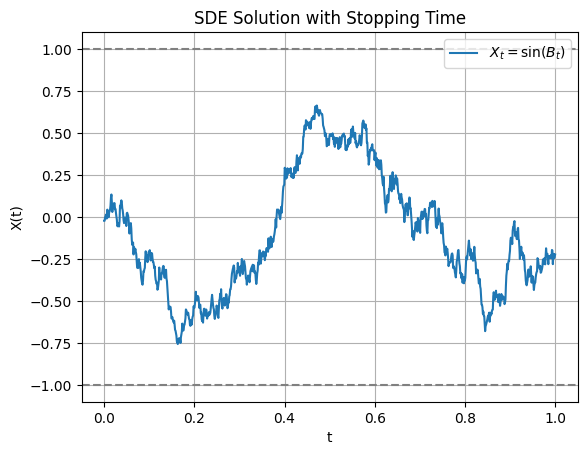

In [17]:
a = 0.0  # B_0 in (-pi/2, pi/2)
B = B + a  # set B_0 = a
# Soluzione: X_t = sin(B_t)
X = np.sin(B)
#X[stop_idx:] = np.nan  # anche X fermo dopo l'uscita


# Plot
plt.plot(t, X, label=r'$X_t = \sin(B_t)$')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("SDE Solution with Stopping Time")
plt.grid(True)
plt.legend()
plt.show()


# 5)Given the system of stochastic differential equations:

$$
\begin{cases}
dX_1(t) = \frac{1}{2} X_1(t)\,dt + X_2(t)\,dB_t \\
dX_2(t) = \frac{1}{2} X_2(t)\,dt + X_1(t)\,dB_t
\end{cases}
$$

In vector form:

$$
dX_t = \frac{1}{2} I\,X_t\,dt + J\,X_t\,dB_t
$$

where:

$$
X_t = 
\begin{bmatrix}
X_1(t) \\
X_2(t)
\end{bmatrix},
\quad
I = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix},
\quad
J = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$


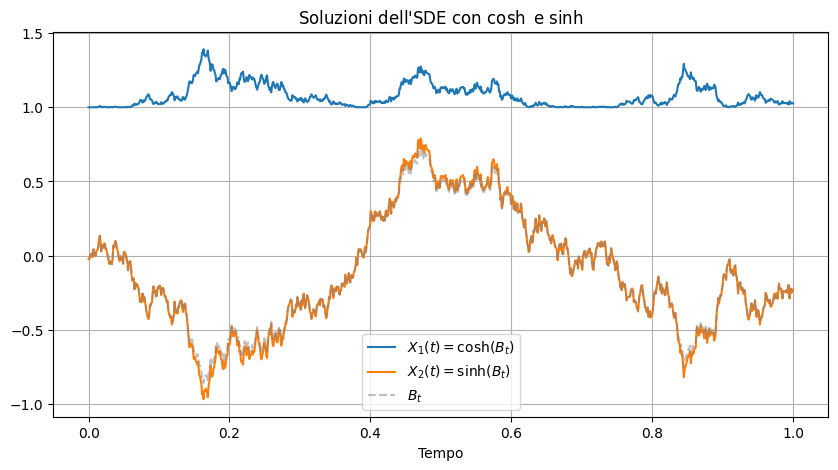

In [18]:
# Soluzioni analitiche
X1 = np.cosh(B)  # cosh(B_t)
X2 = np.sinh(B)  # sinh(B_t)

# Plot
plt.figure(figsize=(10,5))
plt.plot(t, X1, label=r'$X_1(t) = \cosh(B_t)$')
plt.plot(t, X2, label=r'$X_2(t) = \sinh(B_t)$')
plt.plot(t, B, '--', color='gray', alpha=0.5, label=r'$B_t$')
plt.title("Soluzioni dell'SDE con $\cosh$ e $\sinh$")
plt.xlabel('Tempo')
plt.legend()
plt.grid(True)
plt.show()

# 6)

Consider the following SDE driven by a multi-dimensional Brownian motion \( (B_1(t), \dots, B_n(t)) \in \mathbb{R}^n \):
\begin{equation}
dX_t = r X_t \, dt + X_t \left( \sum_{k=1}^n \alpha_k \, dB_k(t) \right), \quad X_0 > 0
\end{equation}
This models exponential growth with multiple independent white noise sources in the growth rate.

## Explicit Solution

Using Itô’s formula, the solution to the SDE is:
\begin{equation}
X_t = X_0 \exp \left[ \left( r - \frac{1}{2} \sum_{k=1}^n \alpha_k^2 \right) t + \sum_{k=1}^n \alpha_k B_k(t) \right]
\end{equation}
This represents the multiplicative exponential of a drift term and a stochastic term involving Brownian motions.


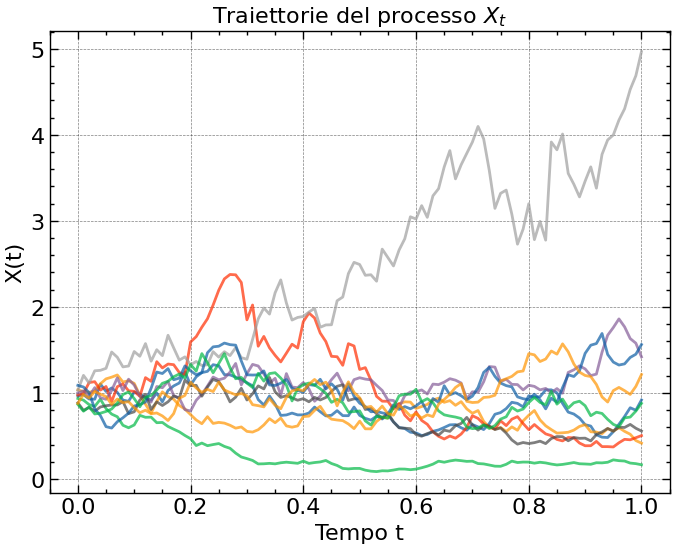

In [55]:
# Parametri
T = 1.0
dt = 0.01
N = int(T / dt)
t = np.linspace(0, T, N+1)

#Brownian motions
alpha = np.array([0.3, 0.2,0.5,0.2,0.6])
n=len(alpha)
r = 0.05
X0 = 1.0
num_paths = 10

paths = []

for _ in range(num_paths):
    B = np.cumsum(np.random.normal(0, np.sqrt(dt), size=(n, N+1)), axis=1)
    exponent = (r - 0.5 * np.sum(alpha**2)) * t + np.sum(alpha[:, None] * B, axis=0)
    Xt = X0 * np.exp(exponent)
    paths.append(Xt)

# Plot
for path in paths:
    plt.plot(t, path, alpha=0.7)

plt.title("Traiettorie del processo $X_t$")
plt.xlabel("Tempo t")
plt.ylabel("X(t)")
plt.grid(True)
plt.show()

# 7)
###  Population growth in a stochastic, crowded environment

Consider the following nonlinear stochastic differential equation (SDE):

$
dX_t = r X_t (K - X_t)\,dt + \beta X_t\,dB_t, \quad X_0 = x > 0
$

where:
$
( r \in \mathbb{R} )$ measures the quality of the environment,

$( K > 0 )$ is the carrying capacity of the environment,

$( \beta \in \mathbb{R} )$ quantifies the intensity of the noise.



An explicit (unique strong) solution to this SDE is given by:

$
X_t = \frac{\exp\left\{ (rK - \tfrac{1}{2}\beta^2)t + \beta B_t \right\}}{x^{-1} + r \int_0^t \exp\left\{ (rK - \tfrac{1}{2}\beta^2)s + \beta B_s \right\}ds}, \quad t \geq 0
$

by Ito's lemma


In [57]:
from ipywidgets import interact
#parameters ( free choice ) 
r=1
K=2
beta=0.3
x0=1
T=10
N=10000
dt=T/N

def plot_sde(r=1.0, K=2.0, beta=0.5):
    t=np.linspace(0,T,N+1)
    np.random.seed(42)
    dB = np.random.normal(0, np.sqrt(dt), size=N) 
    B = np.concatenate(([0], np.cumsum(dB)))  # N+1
    gamma= (r*K-beta**2)
    exp_term = np.exp(gamma * t + beta * B)
    integral = np.cumsum(exp_term[:-1]) * dt 
    denominator = 1/x0 + r * np.concatenate(([0], integral))
    # X(t)
    X = exp_term / denominator

    plt.figure(figsize=(10, 5))
    plt.plot(t, X, label="X(t)")
    plt.title("Population Growth")
    plt.xlabel("Tempo t")
    plt.ylabel("X(t)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()



interact(plot_sde,
         r=(0.1, 3.0, 0.1),
         K=(0.5, 5.0, 0.1),
         beta=(0.0, 1.5, 0.05)) 
plt.show()


interactive(children=(FloatSlider(value=1.0, description='r', max=3.0, min=0.1), FloatSlider(value=2.0, descri…